<a href="https://colab.research.google.com/github/rabinam24/NLP/blob/main/Darazreview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daraz Mobile Sentimental Analysis

In [ ]:
df_path='/content/drive/MyDrive/DarazDataComplete.csv'

# Import libaries

In [ ]:
#Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec,KeyedVectors
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import plotly.express as px
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pickle
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Sample of data

In [ ]:
df = pd.read_csv(df_path)
df.head()

,ProductNumber,BrandName,BrandTitle,URL,AverageRating,Review
0,Product 1,Tecno,Tecno Camon 12 Air - PTA Approved - Brand Warr...,https://www.daraz.pk/products/tecno-camon-12-a...,4.8,Today I have received Tecno camon 12 air It's ...
1,Product 1,Tecno,Tecno Camon 12 Air - PTA Approved - Brand Warr...,https://www.daraz.pk/products/tecno-camon-12-a...,4.8,i hv just bought Tecno Camon-12 Air from Daraz...
2,Product 1,Tecno,Tecno Camon 12 Air - PTA Approved - Brand Warr...,https://www.daraz.pk/products/tecno-camon-12-a...,4.8,Just got with in 18 hours Nice packing butt mo...
3,Product 1,Tecno,Tecno Camon 12 Air - PTA Approved - Brand Warr...,https://www.daraz.pk/products/tecno-camon-12-a...,4.8,Mobile Received within 15 Hours Fast ServiceI ...
4,Product 1,Tecno,Tecno Camon 12 Air - PTA Approved - Brand Warr...,https://www.daraz.pk/products/tecno-camon-12-a...,4.8,just received my Camon 12 Air and I must say i...


In [ ]:
df.shape

(5479, 6)

# Preprocessing

In [ ]:
#Column names
print(f'Feature names :{df.columns.values}')

Feature names :['ProductNumber' 'BrandName' 'BrandTitle' 'URL' 'AverageRating' 'Review']


In [ ]:
df.isnull().sum()

ProductNumber       0
BrandName          82
BrandTitle         56
URL                 0
AverageRating      56
Review           2935
dtype: int64

In [ ]:
df.dtypes

ProductNumber     object
BrandName         object
BrandTitle        object
URL               object
AverageRating    float64
Review            object
dtype: object

In [ ]:
#Handling the null values

df['AverageRating'].fillna(df['AverageRating'].mean(),inplace=True)
df['BrandName'].fillna(method='ffill', inplace=True)
df['BrandTitle'].fillna(method='ffill', inplace=True)
df['Review'].fillna(method='ffill', inplace=True)


In [ ]:
df.isnull().sum()

ProductNumber    0
BrandName        0
BrandTitle       0
URL              0
AverageRating    0
Review           0
dtype: int64

In [ ]:
#Distinct values of 'rating' and its count

print(f"Rating value count: \n{df['AverageRating'].value_counts()}")

Rating value count: 
0.000000    2061
5.000000    1464
4.700000     260
4.800000     259
4.900000     189
4.500000     152
4.600000     137
4.000000     129
4.300000     114
4.400000     101
4.200000      89
3.000000      73
4.100000      67
1.000000      57
2.822478      56
3.800000      54
3.500000      37
3.700000      34
3.900000      33
3.600000      24
2.000000      22
3.300000      18
2.700000      11
3.400000      11
2.500000       9
2.300000       9
1.500000       6
2.800000       2
1.800000       1
Name: AverageRating, dtype: int64


# Exploring 'AverageRating' attributes

In [ ]:
#Converting the float values of 'AverageRating' into integer values of category 0,1,2,3,4 and 5

df['AverageRating']= (df['AverageRating']).astype(int)
print(f"Rating value count: \n{df['AverageRating'].value_counts()}")


Rating value count: 
0    2061
4    1497
5    1464
3     284
2     109
1      64
Name: AverageRating, dtype: int64


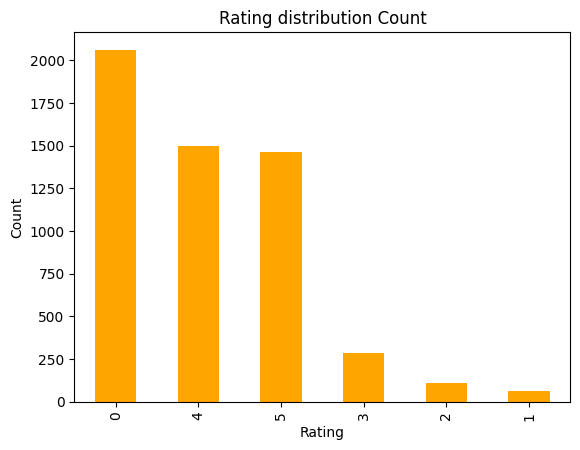

In [ ]:
df['AverageRating'].value_counts().plot.bar(color='orange')
plt.title("Rating distribution Count")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
#Finding the percentage distribution of each rating- we'll divide the number of records for each rating by total number of record

print(f"Rating value count - percentage distribution: \n{round(df['AverageRating'].value_counts()/df.shape[0]*100,2)}")

Rating value count - percentage distribution: 
0    37.62
4    27.32
5    26.72
3     5.18
2     1.99
1     1.17
Name: AverageRating, dtype: float64


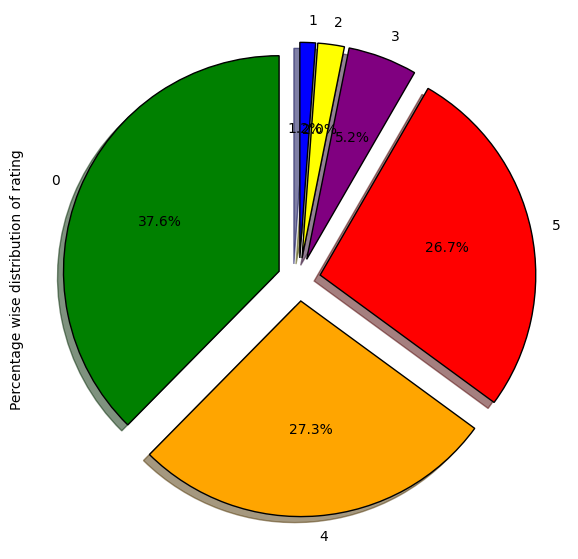

In [ ]:
# Create a new figure with a specific size
fig = plt.figure(figsize=(7, 7))

# Define colors for the pie chart
color = {'red', 'green', 'blue', 'orange', 'yellow','purple'}

# Define wedge properties (linewidth and edgecolor) for the pie chart
wp = {'linewidth': 1, 'edgecolor': 'black'}

# Calculate the percentage distribution of each unique rating
tags = df['AverageRating'].value_counts() / df.shape[0]

# Define an array to explode specific wedges from the center of the pie chart
explode = [0.1, 0.1, 0.1, 0.1, 0.1,0.1]

# Plot a pie chart using the calculated percentages
tags.plot(
    kind='pie',            # Specify the chart type
    autopct='%1.1f%%',     # Display percentage labels on each wedge
    shadow=True,            # Add shadow to the pie chart
    colors=color,           # Use the defined colors
    startangle=90,          # Specify the start angle for the first wedge
    wedgeprops=wp,          # Set properties for the wedges
    explode=explode,        # Explode specific wedges
    label='Percentage wise distribution of rating'      # Label for the chart
)

# Import BytesIO for saving the plot as an image in memory
from io import BytesIO

# Create a BytesIO object to store the image data
graph = BytesIO()

# Save the figure (plot) as a PNG image in the BytesIO object
fig.savefig(graph, format='png')


# Exploring 'BrandName' attributes

In [ ]:
#ANalyzing the 'BrandName' column
print(f"Variation value count: \n{df['BrandName'].value_counts()}")

Variation value count: 
Nokia                     1276
Samsung                    564
Gfive                      408
Infinix                    389
Huawei                     384
                          ... 
Remax                        1
abdulbasit collections       1
AMAZE                        1
Infinite Products            1
Elephone                     1
Name: BrandName, Length: 169, dtype: int64


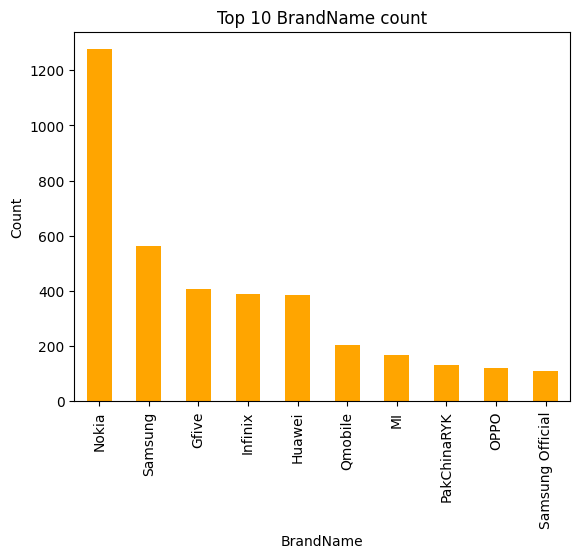

In [ ]:
#Bar plot to visualize the total counts of each 'BrandName'

top_10_brands = df['BrandName'].value_counts().nlargest(10)

top_10_brands.plot.bar(color='orange')
plt.title('Top 10 BrandName count')
plt.xlabel('BrandName')
plt.ylabel('Count')
plt.show()


# WordCloud of review

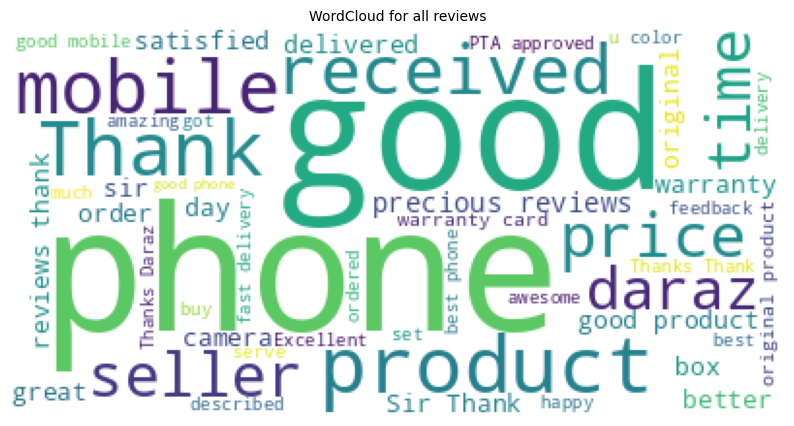

In [ ]:
reviews_= " ".join([review for review in df['Review']])

wc= WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews_))
plt.title('WordCloud for all reviews',fontsize=10)
plt.axis('off')
plt.show()

# Text preprocessing

In [ ]:
df['Review'].head()

0    Today I have received Tecno camon 12 air It's ...
1    i hv just bought Tecno Camon-12 Air from Daraz...
2    Just got with in 18 hours Nice packing butt mo...
3    Mobile Received within 15 Hours Fast ServiceI ...
4    just received my Camon 12 Air and I must say i...
Name: Review, dtype: object

In [ ]:
df['Review']= df['Review'].str.lower()
df['Review'].head()

0    today i have received tecno camon 12 air it's ...
1    i hv just bought tecno camon-12 air from daraz...
2    just got with in 18 hours nice packing butt mo...
3    mobile received within 15 hours fast servicei ...
4    just received my camon 12 air and i must say i...
Name: Review, dtype: object

In [ ]:
#Removing the html tags if present in it
import re
def remove_html_tags(text):
  pattern = re.compile('<.*?>')
  return pattern.sub(r'',text)

In [ ]:
df['Review']= df['Review'].apply(remove_html_tags)
df['Review'].head()

0    today i have received tecno camon 12 air it's ...
1    i hv just bought tecno camon-12 air from daraz...
2    just got with in 18 hours nice packing butt mo...
3    mobile received within 15 hours fast servicei ...
4    just received my camon 12 air and i must say i...
Name: Review, dtype: object

In [ ]:
#Removing the punctuaction present in the sentences
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude= string.punctuation

In [ ]:
def remove_pun(text):
    return text.translate(str.maketrans('','',exclude))



In [ ]:
df['Review']= df['Review'].apply(remove_pun)
df['Review'].head()

0    today i have received tecno camon 12 air its l...
1    i hv just bought tecno camon12 air from darazi...
2    just got with in 18 hours nice packing butt mo...
3    mobile received within 15 hours fast servicei ...
4    just received my camon 12 air and i must say i...
Name: Review, dtype: object

In [ ]:
#Removing the stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(text):
  new_text=[]

  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x= new_text[:]
  new_text.clear()
  return " ". join(x)

In [ ]:
df['Review']= df['Review'].apply(remove_stopwords)
df['Review'] = df['Review'].apply(lambda x: re.sub(r'\d+', '', x)) #Applying to remove the numbers from the sentences
df['Review'].head()

0    today received tecno camon air look elegant ca...
1    hv bought tecno camon air darazits amazing dev...
2    got hours nice packing butt mobile good finger...
3    mobile received within hours fast servicei lov...
4    received camon air must say amazingly awesome ...
Name: Review, dtype: object

In [ ]:
#Tokenization
from nltk.tokenize import word_tokenize
story= df['Review'].apply(lambda x: word_tokenize(x))
story.head()


0    [today, received, tecno, camon, air, look, ele...
1    [hv, bought, tecno, camon, air, darazits, amaz...
2    [got, hours, nice, packing, butt, mobile, good...
3    [mobile, received, within, hours, fast, servic...
4    [received, camon, air, must, say, amazingly, a...
Name: Review, dtype: object

In [ ]:
len(story)

5479

In [ ]:
model = gensim.models.Word2Vec(
    window =7,
    min_count=2,
)

In [ ]:
model.build_vocab(story)

In [ ]:
model.train(story,total_examples=model.corpus_count,epochs=5)

(184410, 237340)

In [ ]:
model.wv.most_similar('mobile')

[('phone', 0.9995219111442566),
 ('camera', 0.9994857311248779),
 ('overall', 0.999301016330719),
 ('great', 0.9991680383682251),
 ('quality', 0.9991178512573242),
 ('price', 0.9990987181663513),
 ('really', 0.9990246891975403),
 ('also', 0.9990058541297913),
 ('working', 0.9989830255508423),
 ('range', 0.9989587664604187)]

In [ ]:
model.wv.get_normed_vectors()

array([[-0.03824563,  0.11485434,  0.00300945, ..., -0.10221352,
         0.1004787 , -0.04079214],
       [-0.03562371,  0.12023913,  0.00018018, ..., -0.10093179,
         0.09728068, -0.03626049],
       [-0.03458612,  0.11126637,  0.00301918, ..., -0.10074048,
         0.09477147, -0.055875  ],
       ...,
       [-0.05382679,  0.07087344, -0.00259834, ..., -0.07784193,
         0.06822812, -0.06688384],
       [-0.08688719,  0.0433286 , -0.01077797, ..., -0.14162314,
         0.02928551, -0.02606967],
       [-0.06522145,  0.1195725 , -0.03155506, ..., -0.10445961,
         0.03604249, -0.06437837]], dtype=float32)

In [ ]:
y= model.wv.index_to_key
y

['good',
 'product',
 'phone',
 'mobile',
 'thanks',
 'thank',
 'sir',
 'daraz',
 'price',
 'received',
 'warranty',
 'delivery',
 'best',
 'time',
 'quality',
 'seller',
 'nice',
 'excellent',
 'original',
 'box',
 'service',
 'great',
 'one',
 'hai',
 'satisfied',
 'battery',
 'fast',
 'reviews',
 'order',
 'days',
 'precious',
 'better',
 'camera',
 'color',
 'card',
 'delivered',
 'experience',
 'low',
 'pta',
 'also',
 'much',
 'awesome',
 'happy',
 'set',
 'k',
 'bad',
 'recommended',
 'amazing',
 'packed',
 'like',
 'ha',
 'working',
 'customer',
 'really',
 'gb',
 'got',
 'well',
 'ordered',
 'thnxxx',
 'buy',
 'please',
 'feedback',
 'packing',
 'approved',
 'always',
 'problem',
 'described',
 'charger',
 'dear',
 'issue',
 'back',
 'display',
 'use',
 'work',
 'condition',
 'range',
 'love',
 'day',
 'acha',
 'genuine',
 'overall',
 'screen',
 'u',
 'star',
 'black',
 'would',
 'dont',
 'perfect',
 'nokia',
 'device',
 'sealed',
 'send',
 'gold',
 'products',
 'new',
 'shopp

In [ ]:
len(y)

2429

In [ ]:
pca= PCA(n_components=3)

In [ ]:
X= pca.fit_transform(model.wv.get_normed_vectors())

In [ ]:
X

array([[-0.01038988, -0.13738124,  0.00690426],
       [-0.00983987, -0.1388612 , -0.00538035],
       [-0.01981817, -0.09563953,  0.00624817],
       ...,
       [ 0.00162407, -0.01490496,  0.02436689],
       [ 0.04623941, -0.00481458,  0.01076007],
       [ 0.13741776,  0.05662016, -0.09978495]], dtype=float32)

In [ ]:
X.shape

(2429, 3)

In [ ]:

figure= px.scatter_3d(X[:100],x=0,y=1,z=2,color=y[:100])
figure.show()

# Let's begin modeling

In [ ]:
# Convert the list of lists into a list of strings
flattened_story = [' '.join(words) for words in story]

# Initialize CountVectorizer
cv = CountVectorizer(max_features=2500)

# Transform the text data
X = cv.fit_transform(flattened_story).toarray()

y= df['AverageRating'].values

In [ ]:

# Create the directory if it doesn't exist
directory_path = 'Models'
os.makedirs(directory_path, exist_ok=True)

# Save the CountVectorizer object to a pickle file
with open(os.path.join(directory_path, 'countVectorizer.pkl'), 'wb') as file:
    pickle.dump(cv, file)


In [ ]:
print(f'X Shape: {X.shape}')
print(f'y shape: {y.shape}')

X Shape: (5479, 2500)
y shape: (5479,)


In [ ]:
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=15)

print(f'X train: {X_train.shape}')
print(f'y train: {y_train.shape}')
print(f'X test: {X_test.shape}')
print(f'y test: {X_test.shape}')

X train: (3835, 2500)
y train: (3835,)
X test: (1644, 2500)
y test: (1644, 2500)


In [ ]:
print(f'X train max value: {X_train.max()}')
print(f'X test max value: {X_test.max()}')


X train max value: 8
X test max value: 6


In [ ]:
#We'll scale X_train and X_test so all values are between 0 and 1.

scaler= MinMaxScaler()

X_train_scl= scaler.fit_transform(X_train)
X_test_scl= scaler.fit_transform(X_test)

In [ ]:
pickle.dump(scaler,open('Models/scaler.pk1','wb'))

## Random Forest

In [ ]:
model_rf= RandomForestClassifier()
model_rf.fit(X_train_scl,y_train)

RandomForestClassifier()

In [ ]:
print('Training Accuracy: ', model_rf.score(X_train_scl,y_train))
print("Testing Accuracy: ", model_rf.score(X_test_scl,y_test))

Training Accuracy:  0.7830508474576271
Testing Accuracy:  0.5863746958637469


In [ ]:
y_preds= model_rf.predict(X_test_scl)

In [ ]:
cm= confusion_matrix(y_test,y_preds)

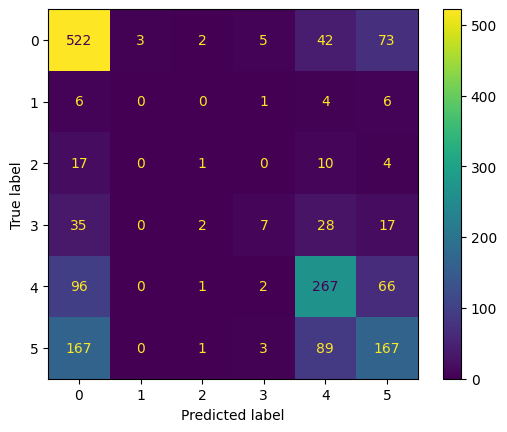

In [ ]:
cm_display= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [ ]:
accuracies= cross_val_score(estimator= model_rf, X=X_train_scl, y=y_train,cv=10)

print("Accuracy: ", accuracies.mean())
print("Standard Variance: ", accuracies.std())

Accuracy:  0.5754834366840732
Standard Variance:  0.016069342240587772


In [ ]:
params={
    'bootstrap': [True],
    'max_depth': [80,100],
    'min_samples_split': [8,12],
    'n_estimators':[100,300]
}

In [ ]:
cv_object= StratifiedKFold(n_splits= 2)

grid_search= GridSearchCV(estimator= model_rf,param_grid=params,cv= cv_object,verbose=0, return_train_score= True)
grid_search.fit(X_train_scl,y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [ ]:
print("Best parameter combination: {}".format(grid_search.best_params_))

Best parameter combination: {'bootstrap': True, 'max_depth': 100, 'min_samples_split': 12, 'n_estimators': 100}


In [ ]:
print("Cross validation mean accuracy on train set:{}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set:{}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set: ",accuracy_score(y_test,y_preds))

Cross validation mean accuracy on train set:77.48045620301968
Cross validation mean accuracy on test set:53.31812108117753
Accuracy score for test set:  0.5863746958637469


## XgBoost

In [ ]:
model_xgb= XGBClassifier()
model_xgb.fit(X_train_scl,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
print("Training Accuracy: ", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy: ", model_xgb.score(X_test_scl, y_test))

Training Accuracy:  0.6761408083441982
Testing Accuracy:  0.5468369829683698


In [ ]:
y_preds= model_xgb.predict(X_test)

In [ ]:
cm= confusion_matrix(y_test,y_preds)
print(cm)

[[420   3   0   3 154  67]
 [  5   1   0   1   7   3]
 [ 15   0   1   1  13   2]
 [ 31   0   1   9  39   9]
 [ 84   1   0   7 293  47]
 [142   0   0   1 164 120]]


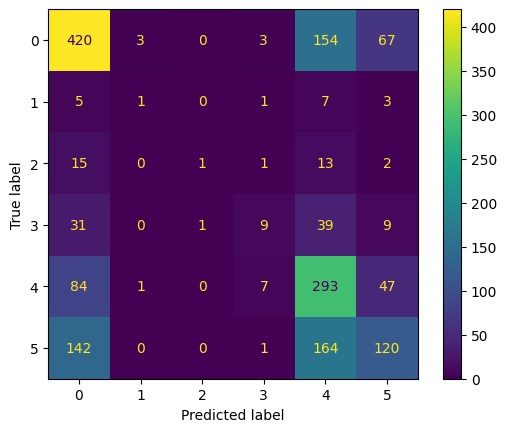

In [ ]:
cm_display= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [ ]:
pickle.dump(model_xgb, open('Models/model_xgb.pk1','wb'))

## Decision Tree

In [ ]:
model_dt= DecisionTreeClassifier()
model_dt.fit(X_train_scl,y_train)

DecisionTreeClassifier()

In [ ]:
print("Training Accuracy: ", model_dt.score(X_train_scl,y_train))
print("Testing Accuracy: ",model_dt.score(X_test_scl, y_test))

Training Accuracy:  0.7830508474576271
Testing Accuracy:  0.5577858880778589


In [ ]:
y_preds= model_dt.predict(X_test)

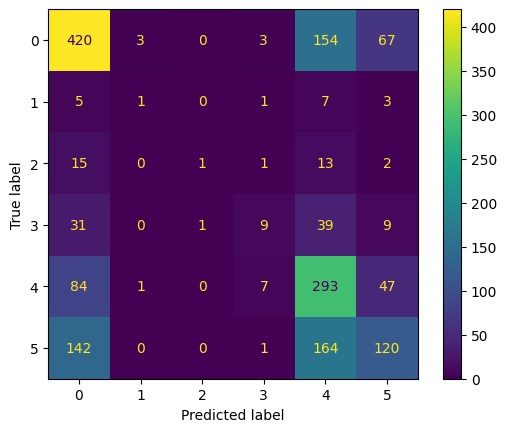

In [ ]:
cm_display= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()